In [416]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
plt.rcParams['figure.dpi'] =120
dep2train = pd.read_csv('data/dep2train.csv')
print("Head of training data:")
print(dep2train.head())
dep2test = pd.read_csv('data/dep2test.csv')
print("Head of test data:")
print(dep2test.head())


Head of training data:
         date  weeklySales
0  2010-02-05    123952.48
1  2010-02-12    119209.48
2  2010-02-19    121430.80
3  2010-02-26    120292.15
4  2010-03-05    113163.91
Head of test data:
         date  weeklySales
0  2011-11-04    108655.66
1  2011-11-11    106841.49
2  2011-11-18     98341.91
3  2011-11-25     97213.06
4  2011-12-02     99976.34


In [417]:
from datetime import date
from datetime import timedelta
dep2train['date'] = pd.to_datetime(dep2train['date'])
dep2train['fold'] = 'train'
dep2test['date'] = pd.to_datetime(dep2test['date'])
dep2test['fold'] = 'test'

In [418]:
def predict(date):#predict only one
    sales=0
    count=0
    for d in dep2train.values:
        if ((d[0]-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)) \
            ==((date-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)):
            sales+=d[1]
            count+=1
    if count:
        return sales//count
y_pred=[]
for d in dep2test['date']:
    y_pred.append(predict(d))

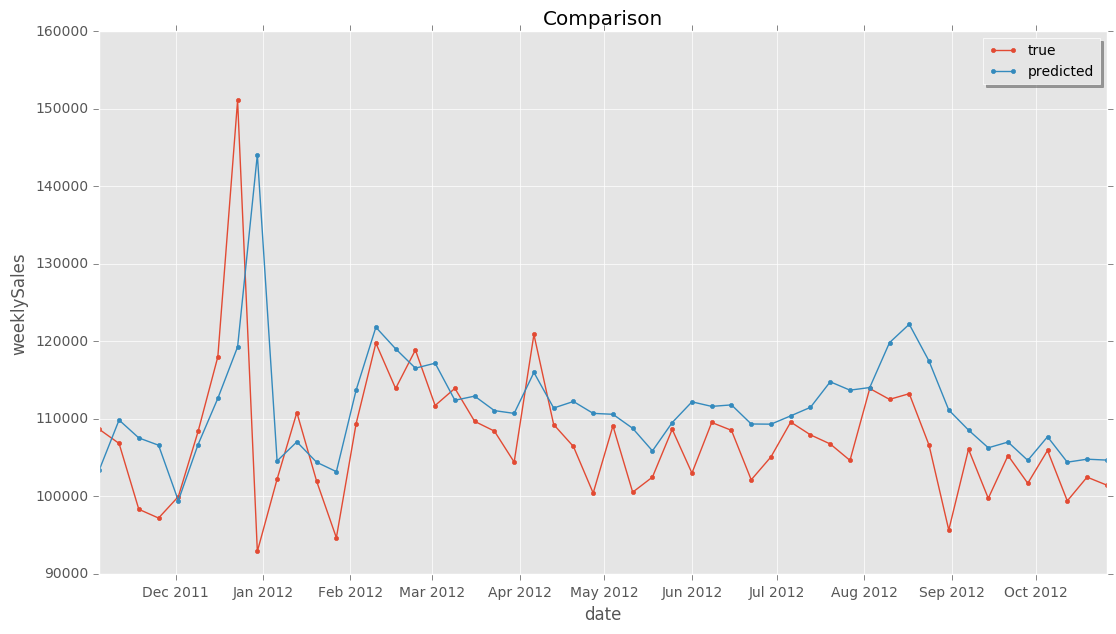

In [419]:
def draw(y_pred):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(dpi= 200, figsize=(len(dep2test['date'])*0.25, 7))
    ax.plot(dep2test['date'], dep2test['weeklySales'], ".-", label="true")
    ax.plot(dep2test['date'], y_pred, ".-", label="predicted")
    legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
    ax.set(xlabel='date', ylabel='weeklySales', title='Comparison')
    # ax.tick_params(pad=100)
    # ax.tick_params(labelsize=5)
    plt.show()
draw(y_pred)

In [420]:
def mape(y_pred):
    y_pred=np.array(y_pred)
    y_real=np.array(dep2test['weeklySales'])
    res=(y_pred-y_real)/y_real
    res=np.sum(res)/len(y_pred)
    return res
print(mape(y_pred))

0.0416786413396186


In [421]:
print(dep2train.shape)
print(dep2test.shape)

(91, 3)
(52, 3)


In [422]:
def transform21(df):
    newdf=pd.DataFrame()
    newdf['t-1']=df['weeklySales'].shift(periods=1, freq=None, axis=0)
    newdf['t-2']=df['weeklySales'].shift(periods=2, freq=None, axis=0)
    newdf['t-3']=df['weeklySales'].shift(periods=3, freq=None, axis=0)
    newdf['t-4']=df['weeklySales'].shift(periods=4, freq=None, axis=0)
    newdf['weeklySales']=df['weeklySales']
    newdf=newdf.dropna(axis=0, how='any')
#     print(newdf.head())
    return newdf
result=transform21(pd.concat([dep2train,dep2test]))
print(result[:5])
Q21train=result.iloc[:-52]
Q21test=result.iloc[-52:]
print(Q21train.shape)
print(Q21test.shape)

         t-1        t-2        t-3        t-4  weeklySales
4  120292.15  121430.80  119209.48  123952.48    113163.91
5  113163.91  120292.15  121430.80  119209.48    116637.87
6  116637.87  113163.91  120292.15  121430.80    112732.09
7  112732.09  116637.87  113163.91  120292.15    110240.07
8  110240.07  112732.09  116637.87  113163.91    118392.02
(87, 5)
(52, 5)


In [423]:
def transform22(df):
    newdf=pd.DataFrame()
    newdf['t-1']=df['weeklySales'].shift(periods=1, freq=None, axis=0)
    newdf['t-2']=df['weeklySales'].shift(periods=2, freq=None, axis=0)
    newdf['t-3']=df['weeklySales'].shift(periods=3, freq=None, axis=0)
    newdf['t-4']=df['weeklySales'].shift(periods=4, freq=None, axis=0)
    newdf['t-52']=df['weeklySales'].shift(periods=52, freq=None, axis=0)
    newdf['weeklySales']=df['weeklySales']
    newdf=newdf.dropna(axis=0, how='any')
#     print(newdf.head)
    return newdf
result=transform22(pd.concat([dep2train,dep2test]))
print(result[:5])
Q22train=result.iloc[:-52]
Q22test=result.iloc[-52:]
print(Q22train.shape)
print(Q22test.shape)

          t-1        t-2        t-3        t-4       t-52  weeklySales
52  103200.60  104415.90  107042.54  104581.13  123952.48    113720.83
53  113720.83  103200.60  104415.90  107042.54  119209.48    119715.02
54  119715.02  113720.83  103200.60  104415.90  121430.80    118892.18
55  118892.18  119715.02  113720.83  103200.60  120292.15    111673.55
56  111673.55  118892.18  119715.02  113720.83  113163.91    114097.02
(39, 6)
(52, 6)


In [432]:
from sklearn.ensemble import RandomForestRegressor
# RF = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=10)
# print(temp/np.timedelta64(1, 'D'))
def predict(train,test):
    print(train.shape)
    print(test.shape)
    RF = RandomForestRegressor(n_estimators=100)
    temp=train.drop(columns='weeklySales')
#     print(temp.shape)
    RF.fit(temp, train['weeklySales'])
    temp=test.drop(columns='weeklySales')
#     print(temp.shape)
    y_pred = RF.predict(temp)
#     print(y_pred)
    print(mape(y_pred))
    return y_pred
#     print(y_pred.shape)
#     print(y_pred)
Q21y_pred=predict(Q21train,Q21test)
Q22y_pred=predict(Q22train,Q22test)

(87, 5)
(52, 5)
0.027289314379733868
(39, 6)
(52, 6)
0.0010825352346293061


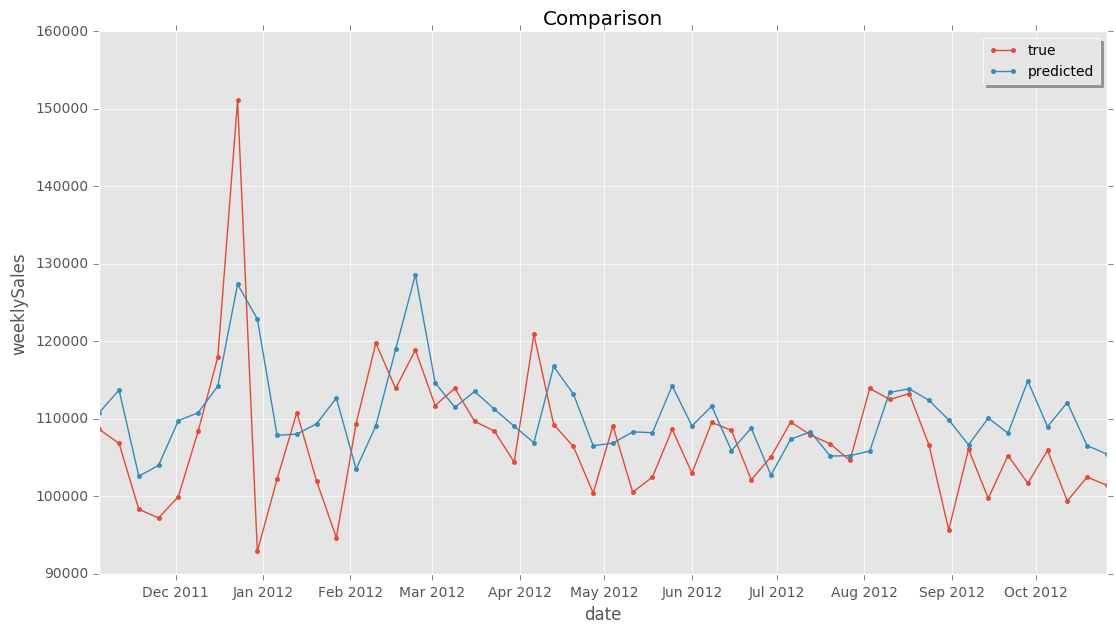

In [430]:
draw(Q21y_pred)

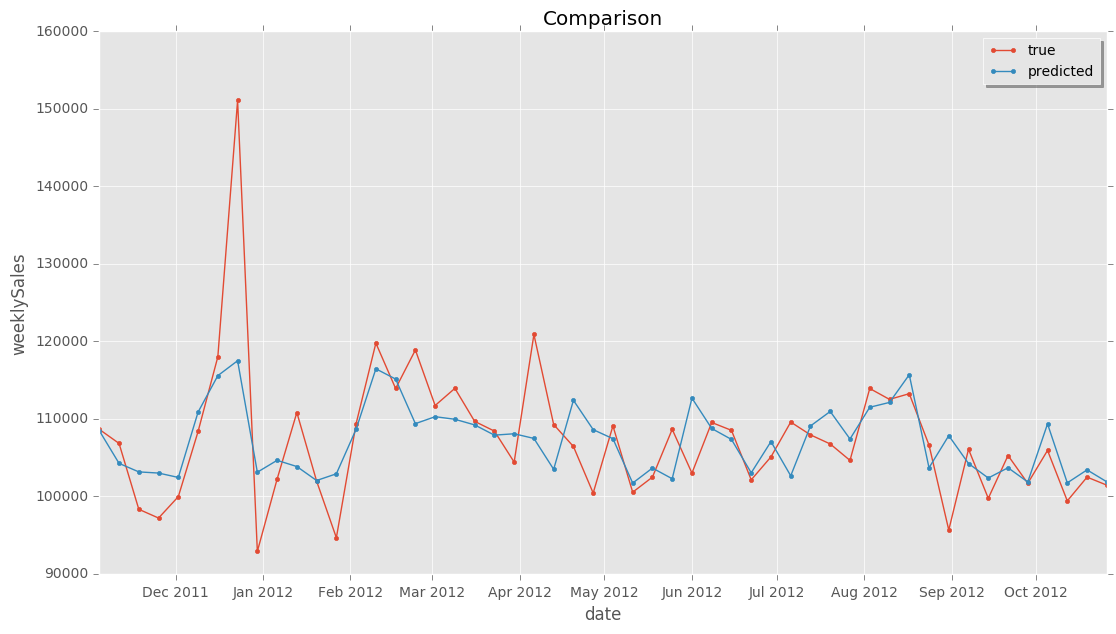

In [431]:
draw(Q22y_pred)

In [433]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(np.array(dep2train['weeklySales']).reshape(-1,1))
X_test_std = sc.transform(np.array(dep2test['weeklySales']).reshape(-1,1))

In [434]:
# xmean=np.mean(dep2train['weeklySales'])
# xstd=np.std(dep2train['weeklySales'])
# x_train_std=(np.array(dep2train['weeklySales'])-xmean)/xstd
# x_test_std=(np.array(dep2test['weeklySales'])-xmean)/xstd

print(x_train_std[:5])
# print(x_test_std)
print(X_train_gg[:5])
# print(X_test_gg.head())
inverted = sc.inverse_transform(x_train_std)
print(inverted[:5])
print(dep2train['weeklySales'].head())

[1.81083399 1.13686396 1.45250872 1.29070902 0.27780156]
[[1.81083399]
 [1.13686396]
 [1.45250872]
 [1.29070902]
 [0.27780156]]
[123952.48 119209.48 121430.8  120292.15 113163.91]
0    123952.48
1    119209.48
2    121430.80
3    120292.15
4    113163.91
Name: weeklySales, dtype: float64


In [435]:
# kernel = ConstantKernel(0.1, (0.001,0.1))*RBF(0.5,(1e-4,10))+ExpSineSquared()+WhiteKernel()
# ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) 
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
k1 = RBF(length_scale=5)  # long term smooth rising trend
k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
k3 = WhiteKernel(noise_level=1e-05)  # noise terms
my_kernel = k1 + k2 + k3
# my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=my_kernel, alpha=0, optimizer=None, normalize_y=True)
temp=np.array((dep2train['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
# print(temp)
gp.fit(temp, x_train_std)
temp=np.array((dep2test['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
Q31y_pred, Q31y_std = gp.predict(temp, return_std=True)
print(Q31y_pred)
print(x_test_std)
inverted = sc.inverse_transform(Q31y_pred)

[-0.90675465 -0.23114252 -0.12141267 -0.82742137 -1.54490801 -1.31803102
  0.25096513  2.59586247  3.17665307 -0.83233642 -0.8110403  -1.10409242
 -0.61313542  0.39708084  1.14731758  1.23740939  0.97173687  0.69831403
  0.31107248 -0.02195911  0.03081415  0.28695057  0.2959364   0.14126276
  0.12706844  0.08039572 -0.18551965 -0.53296247 -0.5400893  -0.16155403
  0.05049486 -0.02130799 -0.04659384 -0.01318159 -0.15629677 -0.27194687
 -0.03724498  0.33610709  0.58486731  0.71764265  0.97985496  1.26436316
  0.99910288  0.23504054 -0.40995198 -0.68946385 -0.81871457 -0.80941303
 -0.6339915  -0.64392121 -0.95260786 -1.20767613]
[-0.362811   -0.62060062 -1.82837253 -1.98877967 -1.59612357 -0.40177706
  0.96789543  5.66708784 -2.60072257 -1.27531497 -0.05369705 -1.31148882
 -2.34952912 -0.25777796  1.21852474  0.38647372  1.09265733  0.07453345
  0.38939809 -0.21615466 -0.39454286 -0.96349833  1.37663416 -0.27379097
 -0.67695662 -1.53093618 -0.29884566 -1.51508091 -1.23836811 -0.36212893
 

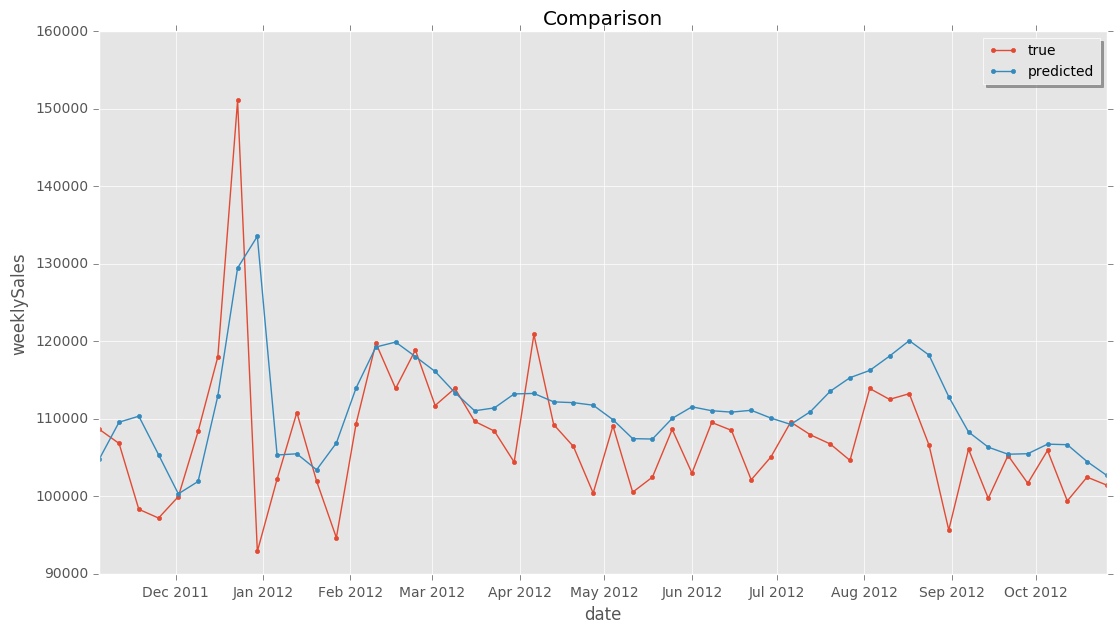

0.040959488698577205


In [436]:
draw(inverted)
print(mape(inverted))

In [437]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
k1 = RBF(length_scale=5)  # long term smooth rising trend
k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
k3 = WhiteKernel(noise_level=1e-05)  # noise terms
my_kernel = k1 + k2 + k3
# my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=my_kernel, alpha=0, optimizer=None, normalize_y=True)
temp=np.array((dep2train['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
# print(temp)
gp.fit(temp, dep2train['weeklySales'])
temp=np.array((dep2test['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
Q32y_pred, Q32y_std = gp.predict(temp, return_std=True)

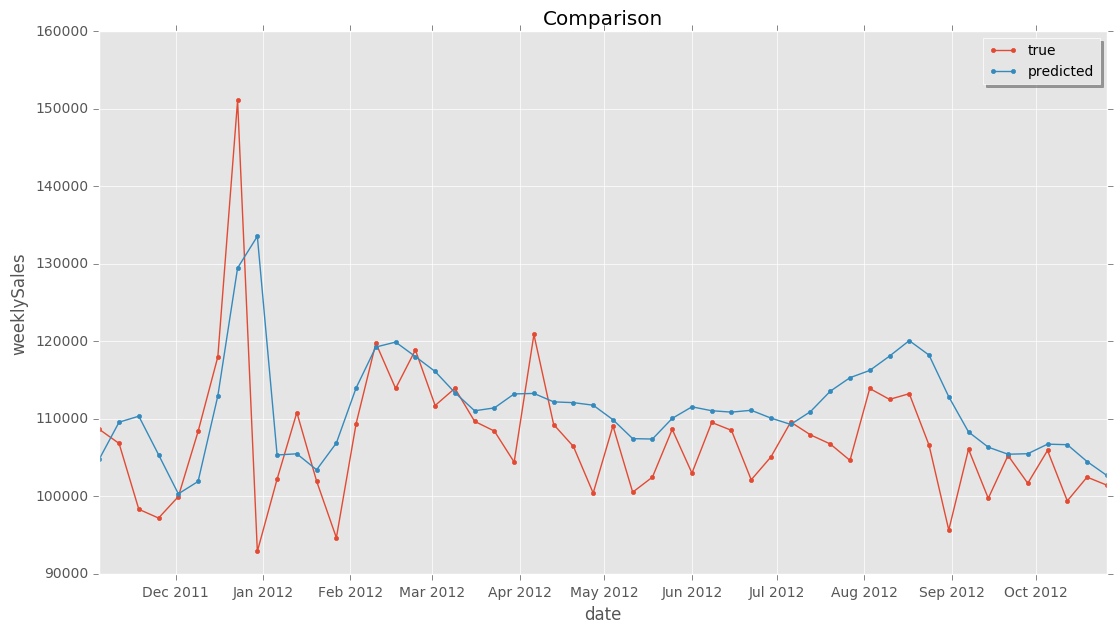

0.04095948869366199


In [365]:
draw(Q32y_pred)
print(mape(Q32y_pred))

          t-1        t-2        t-3        t-4
4   120292.15  121430.80  119209.48  123952.48
5   113163.91  120292.15  121430.80  119209.48
6   116637.87  113163.91  120292.15  121430.80
7   112732.09  116637.87  113163.91  120292.15
8   110240.07  112732.09  116637.87  113163.91
9   118392.02  110240.07  112732.09  116637.87
10  115461.31  118392.02  110240.07  112732.09
11  111207.71  115461.31  118392.02  110240.07
12  111749.11  111207.71  115461.31  118392.02
13  108130.12  111749.11  111207.71  115461.31
14  112995.06  108130.12  111749.11  111207.71
15  108114.87  112995.06  108130.12  111749.11
16  114437.04  108114.87  112995.06  108130.12
17  111234.67  114437.04  108114.87  112995.06
18  112630.91  111234.67  114437.04  108114.87
19  112481.79  112630.91  111234.67  114437.04
20  112540.37  112481.79  112630.91  111234.67
21  108485.17  112540.37  112481.79  112630.91
22  115484.56  108485.17  112540.37  112481.79
23  112082.34  115484.56  108485.17  112540.37
24  117063.04

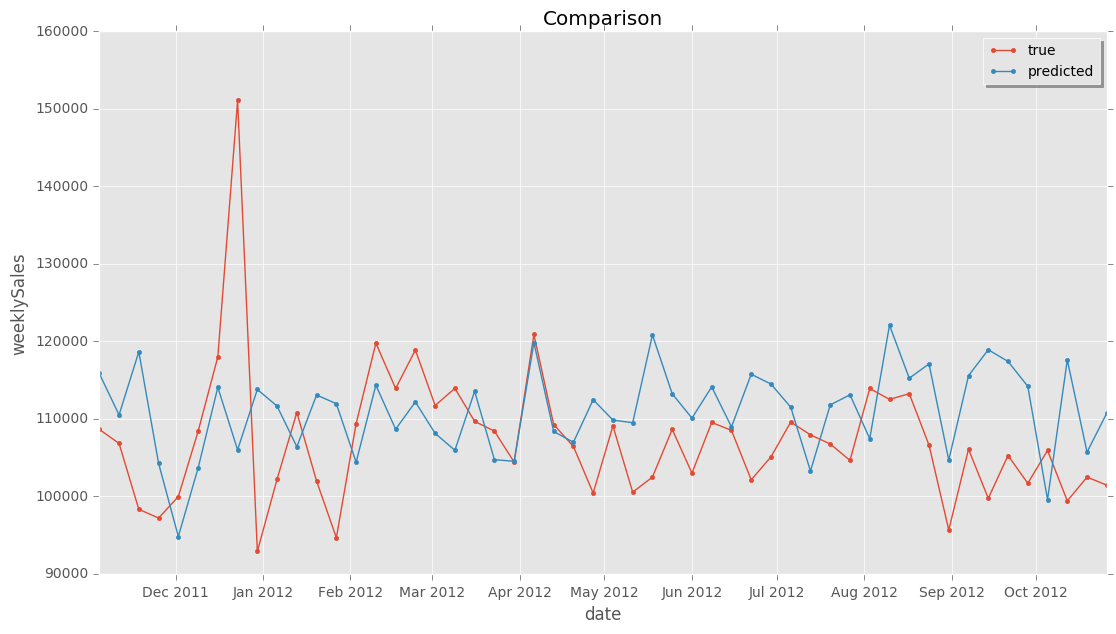

0.04035852193141876


In [466]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
def GP(train,test):
    k1 = RBF(length_scale=5)  # long term smooth rising trend
    k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
    k3 = WhiteKernel(noise_level=1e-05)  # noise terms
    my_kernel = 1.3*k1 + k2 + k3
#     my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
    gp = GaussianProcessRegressor(kernel=my_kernel, alpha=0, optimizer=None, normalize_y=True)
    temp=train.drop(columns='weeklySales')
    print(temp)
    gp.fit(temp, x_train_std[4:])
    temp=test.drop(columns='weeklySales')
    y_pred, y_std = gp.predict(temp, return_std=True)
#     print(y_pred)
#     print(x_test_std)
    inverted = sc.inverse_transform(y_pred)
#     return inverted
result=GP(Q21train,Q21test)
draw(result)
print(mape(result))